# CatBoost

**CatBoost** is a powerful gradient boosting algorithm known for its remarkable performance and unique feature: **self-tuning**. This means that CatBoost automatically optimizes its parameters to achieve the best accuracy without manual tuning.

Developed by Yandex researchers, CatBoost effectively handles categorical data and offers a fast, scalable GPU version.

## Features of CatBoost
1. **Great quality without parameter tuning**: Reduce time spent on parameter tuning, because CatBoost provides great results with default parameters
2. **Categorical features support**: Improve your training results with CatBoost that allows you to use non-numeric factors, instead of having to pre-process your data or spend time and effort turning it to numbers.
3. **Fast and scalable GPU version**: Train your model on a fast implementation of gradient-boosting algorithm for GPU. Use a multi-card configuration for large datasets.
4. **Improved accuracy**: Reduce overfitting when constructing your models with a novel gradient-boosting scheme.
5. **Fast prediction**: Apply your trained model quickly and efficiently even to latency-critical tasks using CatBoost's model applier.

## Goal

The goal of this section is to test CatBoost's performance against XGBoost using a breast cancer dataset, where the objective is to determine whether tumors are benign or malignant.

## References
- [catboost.ai](https://catboost.ai/)

## Importing the libraries

CatBoost must be installed since it is not pre-installed in Google Colab:

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning A-Z/Part 10 - Model Selection & Boosting/3 CatBoost/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training CatBoost on the Training set

The model will automatically tune itself during training, enhancing its predictive capabilities.

In [6]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()

# Fit the classifier to the training data (feature set and target variable)
classifier.fit(X_train, y_train)

Learning rate set to 0.007956
0:	learn: 0.6778283	total: 47.9ms	remaining: 47.8s
1:	learn: 0.6642874	total: 49.2ms	remaining: 24.6s
2:	learn: 0.6510578	total: 50.5ms	remaining: 16.8s
3:	learn: 0.6351685	total: 51.9ms	remaining: 12.9s
4:	learn: 0.6203906	total: 53.1ms	remaining: 10.6s
5:	learn: 0.6053561	total: 54.3ms	remaining: 9s
6:	learn: 0.5913363	total: 55.5ms	remaining: 7.87s
7:	learn: 0.5773888	total: 56.6ms	remaining: 7.02s
8:	learn: 0.5638394	total: 57.8ms	remaining: 6.36s
9:	learn: 0.5507421	total: 58.9ms	remaining: 5.83s
10:	learn: 0.5377201	total: 60.1ms	remaining: 5.4s
11:	learn: 0.5243873	total: 61.2ms	remaining: 5.04s
12:	learn: 0.5129034	total: 62.3ms	remaining: 4.73s
13:	learn: 0.5047204	total: 63.5ms	remaining: 4.47s
14:	learn: 0.4942404	total: 64.7ms	remaining: 4.25s
15:	learn: 0.4836253	total: 65.8ms	remaining: 4.05s
16:	learn: 0.4733355	total: 66.9ms	remaining: 3.87s
17:	learn: 0.4629416	total: 68ms	remaining: 3.71s
18:	learn: 0.4527778	total: 69.5ms	remaining: 3.59

The process of running a CatBoost model: it is currently training and tuning itself over 1,000 iterations. The decreasing values observed are related to Logloss, which indicates the model's performance improvement. The final Logloss is 0.01, signaling good results.

More about Logloss can be found in the catboost.ai website, Benchmarks section:

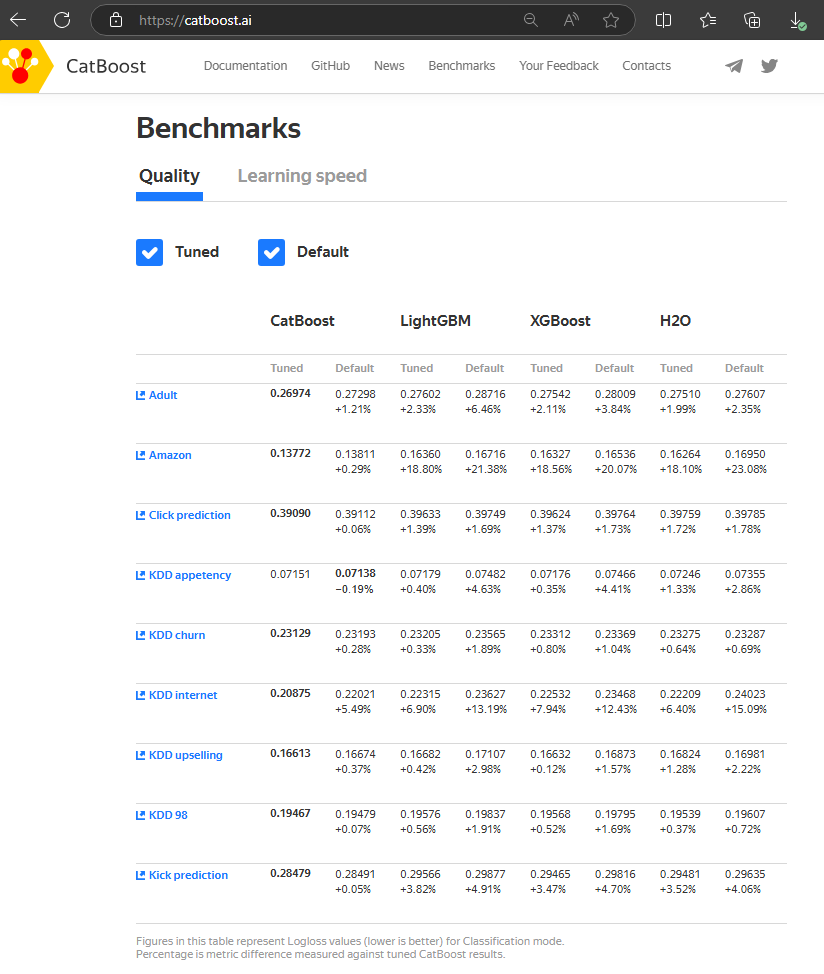

## Making the Confusion Matrix

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[84  3]
 [ 0 50]]


0.9781021897810219

The confusion matrix:

- **True Positives (TP)**: 50
- **True Negatives (TN)**: 84
- **False Positives (FP)**: 3
- **False Negatives (FN)**: 0

The accuracy of **97.81%** (0.9781) indicates that the model correctly classified about 97.8% of the total cases.

Ultimately, the model achieved an accuracy of 97.8% on the test set, matching the performance of an XGBoost model with only three incorrect predictions. This is quite satisfactory and impressive. To ensure the reliability of these results, k-Fold Cross-Validation is applied:



## Applying k-Fold Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the training set using the specified classifier
# 'cv = 10' means using 10-fold cross-validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Se han truncado las últimas 5000 líneas del flujo de salida.
6:	learn: 0.6007221	total: 8.62ms	remaining: 1.22s
7:	learn: 0.5865261	total: 9.78ms	remaining: 1.21s
8:	learn: 0.5760173	total: 11ms	remaining: 1.21s
9:	learn: 0.5641784	total: 12ms	remaining: 1.18s
10:	learn: 0.5538549	total: 13ms	remaining: 1.17s
11:	learn: 0.5413434	total: 14ms	remaining: 1.15s
12:	learn: 0.5308262	total: 15ms	remaining: 1.14s
13:	learn: 0.5187893	total: 16.2ms	remaining: 1.14s
14:	learn: 0.5084890	total: 17.3ms	remaining: 1.14s
15:	learn: 0.4986254	total: 18.5ms	remaining: 1.14s
16:	learn: 0.4890714	total: 19.6ms	remaining: 1.13s
17:	learn: 0.4790883	total: 20.7ms	remaining: 1.13s
18:	learn: 0.4700108	total: 21.9ms	remaining: 1.13s
19:	learn: 0.4630325	total: 23ms	remaining: 1.13s
20:	learn: 0.4536134	total: 24.4ms	remaining: 1.14s
21:	learn: 0.4429695	total: 25.6ms	remaining: 1.14s
22:	learn: 0.4362340	total: 26.7ms	remaining: 1.14s
23:	learn: 0.4280061	total: 27.9ms	remaining: 1.13s
24:	learn: 0.420480

The K-fold cross-validation results show the CatBoost model achieving an accuracy of 97.26%, surpassing the XGBoost model's accuracy of 96.53% by nearly 1%. This highlights the effectiveness of the CatBoost model.